In [5]:
import quickda
from quickda.explore_data import * 
from quickda.explore_categoric import * 
from quickda.explore_numeric import *
from quickda.explore_numeric_categoric import * 
from quickda.clean_data import *
import seaborn as sns
import numpy as np

In [6]:
import pandas as pd
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
url2 = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/variants/covid-variants.csv"
covid19 = pd.read_csv(url)
variants = pd.read_csv(url2)

In [7]:
covid19 = clean(covid19, method = "standardize")

# Wrangling Tasks

* lots of missing values in some columns (should remove these columns? see if left blank instead of being 0)
* High cardinality in iso_code, continent and location
* should countries be aggregated by month instead of daily values
* Time series data, so would be forecasting?
* repeated country information values per daily instance


# Reproduction rate exploration

In [8]:
# repo measured daily

In [9]:
features_to_keep = ["iso_code","continent","location","date","reproduction_rate", "population_density", 
                   "population", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita", "extreme_poverty", "cardiovasc_death_rate",
                   "diabetes_prevalence", "female_smokers", "male_smokers", "hospital_beds_per_thousand", "life_expectancy", "human_development_index"]

In [10]:
repo_rate = covid19[features_to_keep]

In [11]:
repo_rate

,iso_code,continent,location,date,reproduction_rate,population_density,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,NaN,54.422,38928341.0,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,NaN,54.422,38928341.0,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,NaN,54.422,38928341.0,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,NaN,54.422,38928341.0,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,NaN,54.422,38928341.0,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103903,ZWE,Africa,Zimbabwe,2021-07-16,1.38,42.729,14862927.0,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
103904,ZWE,Africa,Zimbabwe,2021-07-17,1.38,42.729,14862927.0,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
103905,ZWE,Africa,Zimbabwe,2021-07-18,1.38,42.729,14862927.0,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
103906,ZWE,Africa,Zimbabwe,2021-07-19,NaN,42.729,14862927.0,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [12]:
explore(repo_rate, method = "profile", is_large_dataset=True, report_name="COVID_19 Data")

/Users/lukehoward/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
countries = repo_rate["iso_code"].unique()
countries_to_drop = list()


for i in countries:
    if repo_rate.loc[repo_rate["iso_code"] == i, "reproduction_rate"].unique().size == 1:
        countries_to_drop.append(i)

In [16]:
len(countries_to_drop)

# 46 countries with no reproduction rate information, will remove from data from here

46

In [17]:
repo_rate_reduced = repo_rate[~repo_rate['iso_code'].isin(countries_to_drop)]

In [18]:
repo_rate_reduced.at[0,"reproduction_rate"] = 0

In [19]:
repo_rate_reduced["reproduction_rate"] = repo_rate_reduced["reproduction_rate"].fillna(0)
repo_index = list(repo_rate_reduced.index)

/Users/lukehoward/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# work out why running twice to get desire result?

previous_rate = 0
    
for i in repo_index:
    current_rate = repo_rate_reduced.at[i,"reproduction_rate"]
    
    if current_rate == 0:
        repo_rate_reduced.at[i,"reproduction_rate"] = previous_rate
        previous_rate = current_rate
        
    previous_rate = current_rate    

## Prior to outlier removal

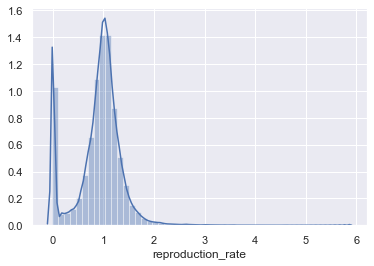

In [23]:
ax = sns.distplot(repo_rate_reduced["reproduction_rate"])
plt.show(ax)

# shows right skew

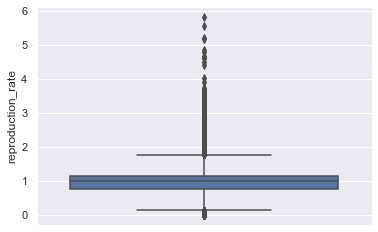

In [24]:
ax = sns.boxplot(repo_rate_reduced["reproduction_rate"], orient="v")
plt.show(ax)

# quite a few outliers indicated 

## Post outlier removal

In [25]:
from scipy import stats

z_scores = stats.zscore(np.array(repo_rate_reduced["reproduction_rate"]))

repo_rate_reduced["z_score"] = z_scores

repo_rate_clean = repo_rate_reduced[(abs(repo_rate_reduced["z_score"]) < 3)]

# 9880 possible outliers based on z_score

/Users/lukehoward/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



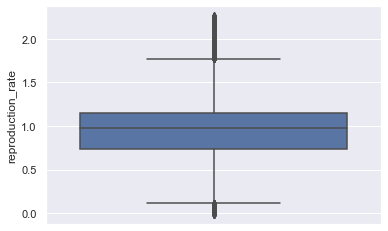

In [27]:
ax = sns.boxplot(repo_rate_clean["reproduction_rate"], orient="v")
plt.show(ax)

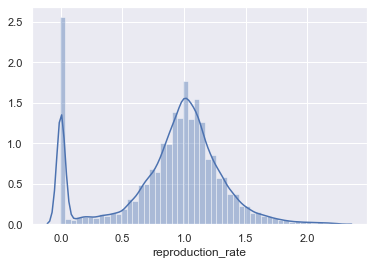

In [28]:
ax = sns.distplot(repo_rate_clean["reproduction_rate"])
plt.show(ax)

# much better distributions according to both plots with z_score > values removed

In [32]:
repo_cor = repo_rate_clean.corr()
repo_cor["reproduction_rate"]

reproduction_rate             1.000000
population_density           -0.014642
population                    0.047578
median_age                    0.112748
aged_65_older                 0.113530
aged_70_older                 0.111442
gdp_per_capita                0.065912
extreme_poverty              -0.104153
cardiovasc_death_rate        -0.046425
diabetes_prevalence          -0.087436
female_smokers                0.060746
male_smokers                 -0.047654
hospital_beds_per_thousand    0.031274
life_expectancy               0.092660
human_development_index       0.097602
z_score                       1.000000
Name: reproduction_rate, dtype: float64

* The removal of rows with z_scores > 3 or or < -3 results in much better distribution as seen in box and distance plots. 
* A total of 9880 values were removed with 1864640 instances remaining in the data. 
* A total of 46 countries were omited from the data set prior to outlier removal as they were comprised of all null values. 
* Correlation values indicate that no features are currently strongly correlated with reproduction rate, however it may be expected that this will correlate with other datasets being explored (deaths, vaccination, etc). 
* Next steps could involve developing more complex visualisations (change in repo rate with date, differences based on poverty rating
* beleive data is in a relatively useable state at this point. No missing values or null. Missing values were filled assuming that a null value represented no change in reproduction rate from previous day

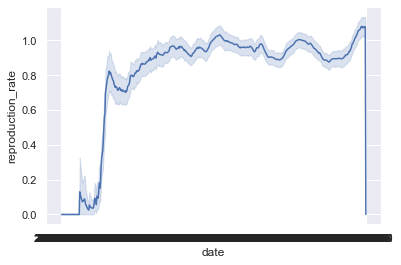

In [37]:
ax = sns.lineplot(x = "date", y = "reproduction_rate", data = repo_rate_clean)
plt.show(ax)

# Variants exploration

In [38]:
variants

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-12-21,B.1.160,0.0,0.0,93
1,Angola,2020-12-21,B.1.620,0.0,0.0,93
2,Angola,2020-12-21,B.1.258,0.0,0.0,93
3,Angola,2020-12-21,B.1.221,NaN,NaN,93
4,Angola,2020-12-21,B.1.1.302,NaN,NaN,93
...,...,...,...,...,...,...
32057,Zimbabwe,2021-02-08,B.1.621,NaN,NaN,37
32058,Zimbabwe,2021-02-08,S:677H.Robin1,NaN,NaN,37
32059,Zimbabwe,2021-02-08,S:677P.Pelican,NaN,NaN,37
32060,Zimbabwe,2021-02-08,others,0.0,0.0,37


In [40]:
explore(variants, method = "profile", is_large_dataset=True)

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
countries = variants["location"].unique()
countries_to_drop = list()

for i in countries:
    if variants.loc[variants["location"] == i, "num_sequences"].unique().size == 1:
        countries_to_drop.append(i)
        
# only 82 countries present         

In [50]:
variants["num_sequences"] = variants["num_sequences"].fillna(0)
var_index = list(variants.index)

In [51]:
previous_rate = 0
    
for i in var_index:
    current_rate = variants.at[i,"num_sequences"]
    
    if current_rate == 0:
        variants.at[i,"num_sequences"] = previous_rate
        previous_rate = current_rate
        
    previous_rate = current_rate    

In [52]:
variants

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-12-21,B.1.160,0.0,0.0,93
1,Angola,2020-12-21,B.1.620,0.0,0.0,93
2,Angola,2020-12-21,B.1.258,0.0,0.0,93
3,Angola,2020-12-21,B.1.221,0.0,NaN,93
4,Angola,2020-12-21,B.1.1.302,0.0,NaN,93
...,...,...,...,...,...,...
32057,Zimbabwe,2021-02-08,B.1.621,0.0,NaN,37
32058,Zimbabwe,2021-02-08,S:677H.Robin1,0.0,NaN,37
32059,Zimbabwe,2021-02-08,S:677P.Pelican,0.0,NaN,37
32060,Zimbabwe,2021-02-08,others,0.0,0.0,37


In [67]:
total_variant_seq = pd.DataFrame(variants[["variant", "num_sequences"]].groupby(["variant"]).agg('sum'))
total_variant_seq

,num_sequences
variant,
Alpha,997137.0
B.1.1.277,8728.0
B.1.1.302,13874.0
B.1.1.519,21768.0
B.1.160,261095.0
B.1.177,172731.0
B.1.221,18311.0
B.1.258,27340.0
B.1.367,21697.0


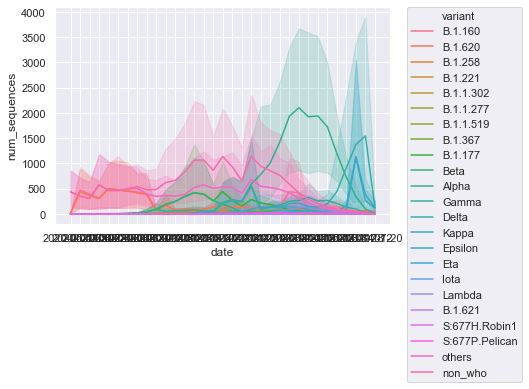

In [56]:
ax = sns.lineplot(x = "date", y = "num_sequences", data = variants,
                 hue = "variant")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(ax)